In [1]:
import os  # dosya ve klasör işlemleri için
import cv2  # görüntü işleme için 
import numpy as np  # matematiksel işlemler ve diziler için
import matplotlib.pyplot as plt  # görüntüleri çizmek için
from sklearn.model_selection import train_test_split  # veri setini bölmek için
from tensorflow.keras.models import Sequential  # model oluşturmak için
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # sinir ağı katmanları
from tensorflow.keras.utils import to_categorical  # verileri kategorilere ayırmak için
from tensorflow.keras.optimizers import Adam  # adam optimizer, learning rate ayarlamak için


In [2]:
# klasör yolları
positive_path = "positive"  # janserli 
negative_path = "negative"  # sağlıklı 

# görüntüleri ve etiketler için listeler
images = []
labels = []

# desteklenen uzantılar
valid_extensions = ['.png', '.jpg', '.jpeg']

# pozitif görüntüleri yükle
for img_name in os.listdir(positive_path):
    img_path = os.path.join(positive_path, img_name)
    
    # desteklenmeyen dosyaları geç ds store için gerek
    if not img_name.lower().endswith(tuple(valid_extensions)):
        print(f"Desteklenmeyen dosya formatı: {img_name}")
        continue
    
    # görüntüyü yükle
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    #yüklenmediyse
    if img is None:
        print(f"Görüntü yüklenemedi: {img_path}")
        continue
    
    # görüntüyü yeniden boyutlandırıyoz 128x128
    img = cv2.resize(img, (128, 128))
    images.append(img)
    labels.append(1)  # etiket: kanserli

# Negatif görüntüler yukardakilerin aynısı
for img_name in os.listdir(negative_path):
    img_path = os.path.join(negative_path, img_name)
    
    # desteklenmeyen dosyaları geç yine ds store için
    if not img_name.lower().endswith(tuple(valid_extensions)):
        print(f"Desteklenmeyen dosya formatı: {img_name}")
        continue
    
    # görüntüyü yükleyip gri renge çeviriyoz
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # yükleme başarısızsa geç
    if img is None:
        print(f"Görüntü yüklenemedi: {img_path}")
        continue
    
    # görüntüyü yeniden boyutlandırıyoz
    img = cv2.resize(img, (128, 128))
    images.append(img)
    labels.append(0)  # Etiket: Sağlıklı

# görüntüleri ve etiketleri numpy array formatına çevirmek için
images = np.array(images)
labels = np.array(labels)

print("Toplam görüntü sayısı:", len(images))
print("Görüntü boyutu:", images[0].shape)


Desteklenmeyen dosya formatı: .DS_Store
Desteklenmeyen dosya formatı: .DS_Store
Toplam görüntü sayısı: 227
Görüntü boyutu: (128, 128)


In [3]:
images = images / 255.0

# etiketleri kategorik hale getiriyo (0 ve 1 değerleri)
labels = to_categorical(labels)

# veriyi eğitim ve test olarak ayır yüzde 20
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Giriş verisini CNN için 4 boyutlu hale getir (128x128 -> 128x128x1)
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

print("Eğitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)


Eğitim verisi boyutu: (181, 128, 128, 1)
Test verisi boyutu: (46, 128, 128, 1)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(128, 128, 1)),  # Giriş katmanı
    Conv2D(64, (3, 3), activation='relu'),  # İlk Conv2D katmanı
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,215,490 (50.41 MB)

 Trainable params: 13,215,490 (50.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - accuracy: 0.5306 - loss: 0.8919 - val_accuracy: 0.6087 - val_loss: 0.6600
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - accuracy: 0.7317 - loss: 0.6029 - val_accuracy: 0.7609 - val_loss: 0.5404
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.7381 - loss: 0.6344 - val_accuracy: 0.8261 - val_loss: 0.5087
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 0.8138 - loss: 0.4785 - val_accuracy: 0.8261 - val_loss: 0.4800
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.8120 - loss: 0.4478 - val_accuracy: 0.8043 - val_loss: 0.4615
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - accuracy: 0.7980 - loss: 0.4255 - val_accuracy: 0.7826 - val_loss: 0.4645
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - accuracy: 0.8537 - loss: 0.3524 - val_accuracy: 0.8043 - val_loss: 0.4695
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.8287 - loss: 0.3142 - val_accuracy: 0.7826 - val_loss:

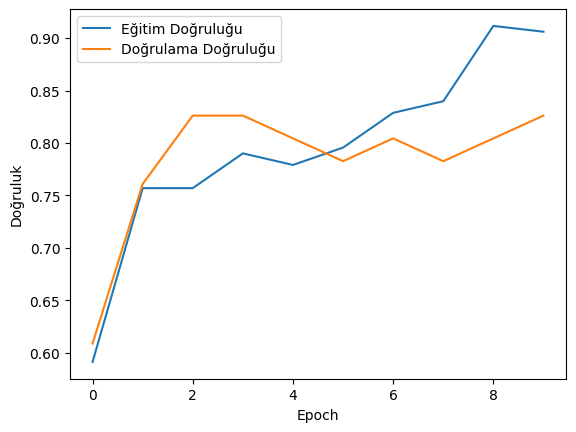

In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

# eğitim sonuçlarını görselleştir 
#hata arısan baştan başla
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Doğruluğu:", test_acc)
train_accuracy = history.history['accuracy'][-1]  # son epoch'taki eğitim doğruluğu
print("Son Epoch Eğitim Doğruluğu:", train_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8007 - loss: 0.6780
Test Doğruluğu: 0.8260869383811951
Son Epoch Eğitim Doğruluğu: 0.9060773253440857


In [14]:
def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = img.reshape(1, 128, 128, 1)
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    if class_idx == 1:
        print("Tahmin: Kanserli")
    else:
        print("Tahmin: Sağlıklı")

#orn bir görüntü test


predict_image("kendi görüntülerim/.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Tahmin: Sağlıklı
